In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
df = pd.read_excel("Data/Raw/Rockburst_in_tunnel.xlsx",header=None)

In [185]:
df.head()

,0
0,1 41 5.968 4.694 3.727 4.926 3.653 11 Intense
1,2 14 5.841 4.622 1.556 4.887 3.668 9 Moderate
2,3 17 4.754 4.397 1.889 3.8 3.443 9 Moderate
3,4 18 5.295 4.703 1.8 4.295 3.703 10 Moderate
4,5 10 5.322 4.238 1.429 4.477 3.393 7 Moderate


In [186]:
# spliting into columns
df=df[0].str.split(expand=True)

In [187]:
df.head()

,0,1,2,3,4,5,6,7,8
0,1,41,5.968,4.694,3.727,4.926,3.653,11,Intense
1,2,14,5.841,4.622,1.556,4.887,3.668,9,Moderate
2,3,17,4.754,4.397,1.889,3.8,3.443,9,Moderate
3,4,18,5.295,4.703,1.8,4.295,3.703,10,Moderate
4,5,10,5.322,4.238,1.429,4.477,3.393,7,Moderate


In [188]:
df.drop(0,axis=1,inplace=True)

In [189]:
# Giving columns an appropriate names
df.columns = [
    "Energy_Unit",
    "Energy_density_Joule",
    "Volume_m3",
    "Event_freq_unit_per_day",
    "Energy_Joule_per_day",
    "Volume_m3_per_day",
    "Duration_days",
    "Intensity_Level"
]


In [190]:
df.head()

,Energy_Unit,Energy_density_Joule,Volume_m3,Event_freq_unit_per_day,Energy_Joule_per_day,Volume_m3_per_day,Duration_days,Intensity_Level
0,41,5.968,4.694,3.727,4.926,3.653,11,Intense
1,14,5.841,4.622,1.556,4.887,3.668,9,Moderate
2,17,4.754,4.397,1.889,3.8,3.443,9,Moderate
3,18,5.295,4.703,1.8,4.295,3.703,10,Moderate
4,10,5.322,4.238,1.429,4.477,3.393,7,Moderate


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Energy_Unit              91 non-null     object
 1   Energy_density_Joule     91 non-null     object
 2   Volume_m3                91 non-null     object
 3   Event_freq_unit_per_day  91 non-null     object
 4   Energy_Joule_per_day     91 non-null     object
 5   Volume_m3_per_day        91 non-null     object
 6   Duration_days            91 non-null     object
 7   Intensity_Level          91 non-null     object
dtypes: object(8)
memory usage: 5.8+ KB


In [192]:
# Convert all feature columns to numeric type safely
df["Energy_Unit"] = pd.to_numeric(df["Energy_Unit"], errors='coerce')
df["Energy_density_Joule"] = pd.to_numeric(df["Energy_density_Joule"], errors='coerce')
df["Volume_m3"] = pd.to_numeric(df["Volume_m3"], errors='coerce')
df["Event_freq_unit_per_day"] = pd.to_numeric(df["Event_freq_unit_per_day"], errors='coerce')
df["Energy_Joule_per_day"] = pd.to_numeric(df["Energy_Joule_per_day"], errors='coerce')
df["Volume_m3_per_day"] = pd.to_numeric(df["Volume_m3_per_day"], errors='coerce')
df["Duration_days"] = pd.to_numeric(df["Duration_days"], errors='coerce')


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Energy_Unit              91 non-null     int64  
 1   Energy_density_Joule     91 non-null     float64
 2   Volume_m3                91 non-null     float64
 3   Event_freq_unit_per_day  91 non-null     float64
 4   Energy_Joule_per_day     91 non-null     float64
 5   Volume_m3_per_day        91 non-null     float64
 6   Duration_days            91 non-null     int64  
 7   Intensity_Level          91 non-null     object 
dtypes: float64(5), int64(2), object(1)
memory usage: 5.8+ KB


In [194]:
df.isnull().sum()

Energy_Unit                0
Energy_density_Joule       0
Volume_m3                  0
Event_freq_unit_per_day    0
Energy_Joule_per_day       0
Volume_m3_per_day          0
Duration_days              0
Intensity_Level            0
dtype: int64

In [195]:
df["Intensity_Level"].unique()

array(['Intense', 'Moderate', 'Slight', 'None'], dtype=object)

In [196]:
df["Intensity_Level"] = df["Intensity_Level"].replace({"None": "Stable"})

In [197]:
from sklearn.preprocessing import LabelEncoder

Intensity_level_mapping={"Stable":0,"Slight":1,"Moderate":2,"Intense":3}
df["Intensity_Level_encoded"]=df["Intensity_Level"].map(Intensity_level_mapping)


In [198]:
df["Intensity_Level"].unique()

array(['Intense', 'Moderate', 'Slight', 'Stable'], dtype=object)

In [199]:
df.describe()

,Energy_Unit,Energy_density_Joule,Volume_m3,Event_freq_unit_per_day,Energy_Joule_per_day,Volume_m3_per_day,Duration_days,Intensity_Level_encoded
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,12.340659,4.363945,4.132923,1.662473,3.539187,3.318835,7.769231,1.142857
std,13.133688,1.450148,0.659514,1.689152,1.338949,0.588594,4.422360,1.060099
min,1.000000,0.780000,2.511000,0.111000,0.178000,1.666000,1.000000,0.000000
25%,3.500000,3.781000,3.718000,0.725000,2.870500,2.956500,4.000000,0.000000
50%,8.000000,4.614000,4.238000,1.222000,3.739000,3.474000,7.000000,1.000000
75%,17.000000,5.311000,4.643500,2.000000,4.575000,3.724500,10.000000,2.000000
max,70.000000,7.094000,5.168000,12.250000,5.890000,4.393000,23.000000,3.000000


In [200]:
lower_p = 1
upper_p = 97

lower = np.percentile(df["Energy_Unit"], lower_p)
upper = np.percentile(df["Energy_Unit"], upper_p)
print(lower)
print(upper)


1.0
49.0


# Clipping data at 1st and 99th percentile to remove extreme features

In [201]:
features=df.columns.drop(["Intensity_Level_encoded","Intensity_Level"])

In [202]:
for col in features:
    lower = np.percentile(df[col], lower_p)
    upper = np.percentile(df[col], upper_p)
    df[col] = np.clip(df[col], lower, upper)

In [203]:
df.describe()

,Energy_Unit,Energy_density_Joule,Volume_m3,Event_freq_unit_per_day,Energy_Joule_per_day,Volume_m3_per_day,Duration_days,Intensity_Level_encoded
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,12.010989,4.354509,4.133324,1.578603,3.535533,3.315526,7.668132,1.142857
std,11.922429,1.434590,0.651525,1.287998,1.327660,0.582447,4.152453,1.060099
min,1.000000,0.780000,2.712600,0.161400,0.290500,1.678600,1.000000,0.000000
25%,3.500000,3.781000,3.718000,0.725000,2.870500,2.956500,4.000000,0.000000
50%,8.000000,4.614000,4.238000,1.222000,3.739000,3.474000,7.000000,1.000000
75%,17.000000,5.311000,4.643500,2.000000,4.575000,3.724500,10.000000,2.000000
max,49.000000,6.466100,5.102300,5.897500,5.645000,4.218100,16.600000,3.000000


# Feature Enginerring

In [204]:
# Energy per Volume  (Formula: Energy_Unit / Volume_m3)
df["Energy_per_Volume"]=df["Energy_Unit"]/df["Volume_m3"]

In [205]:
# Saving the df 
df.to_csv('Data/PreProcessed/Rockburst_in_Tunnel_V1.csv', index=False)

In [206]:
df.head()

,Energy_Unit,Energy_density_Joule,Volume_m3,Event_freq_unit_per_day,Energy_Joule_per_day,Volume_m3_per_day,Duration_days,Intensity_Level,Intensity_Level_encoded,Energy_per_Volume
0,41,5.968,4.694,3.727,4.926,3.653,11.0,Intense,3,8.734555
1,14,5.841,4.622,1.556,4.887,3.668,9.0,Moderate,2,3.028992
2,17,4.754,4.397,1.889,3.800,3.443,9.0,Moderate,2,3.866272
3,18,5.295,4.703,1.800,4.295,3.703,10.0,Moderate,2,3.827344
4,10,5.322,4.238,1.429,4.477,3.393,7.0,Moderate,2,2.359604


In [210]:
features=df.columns.drop(["Intensity_Level_encoded","Intensity_Level"])

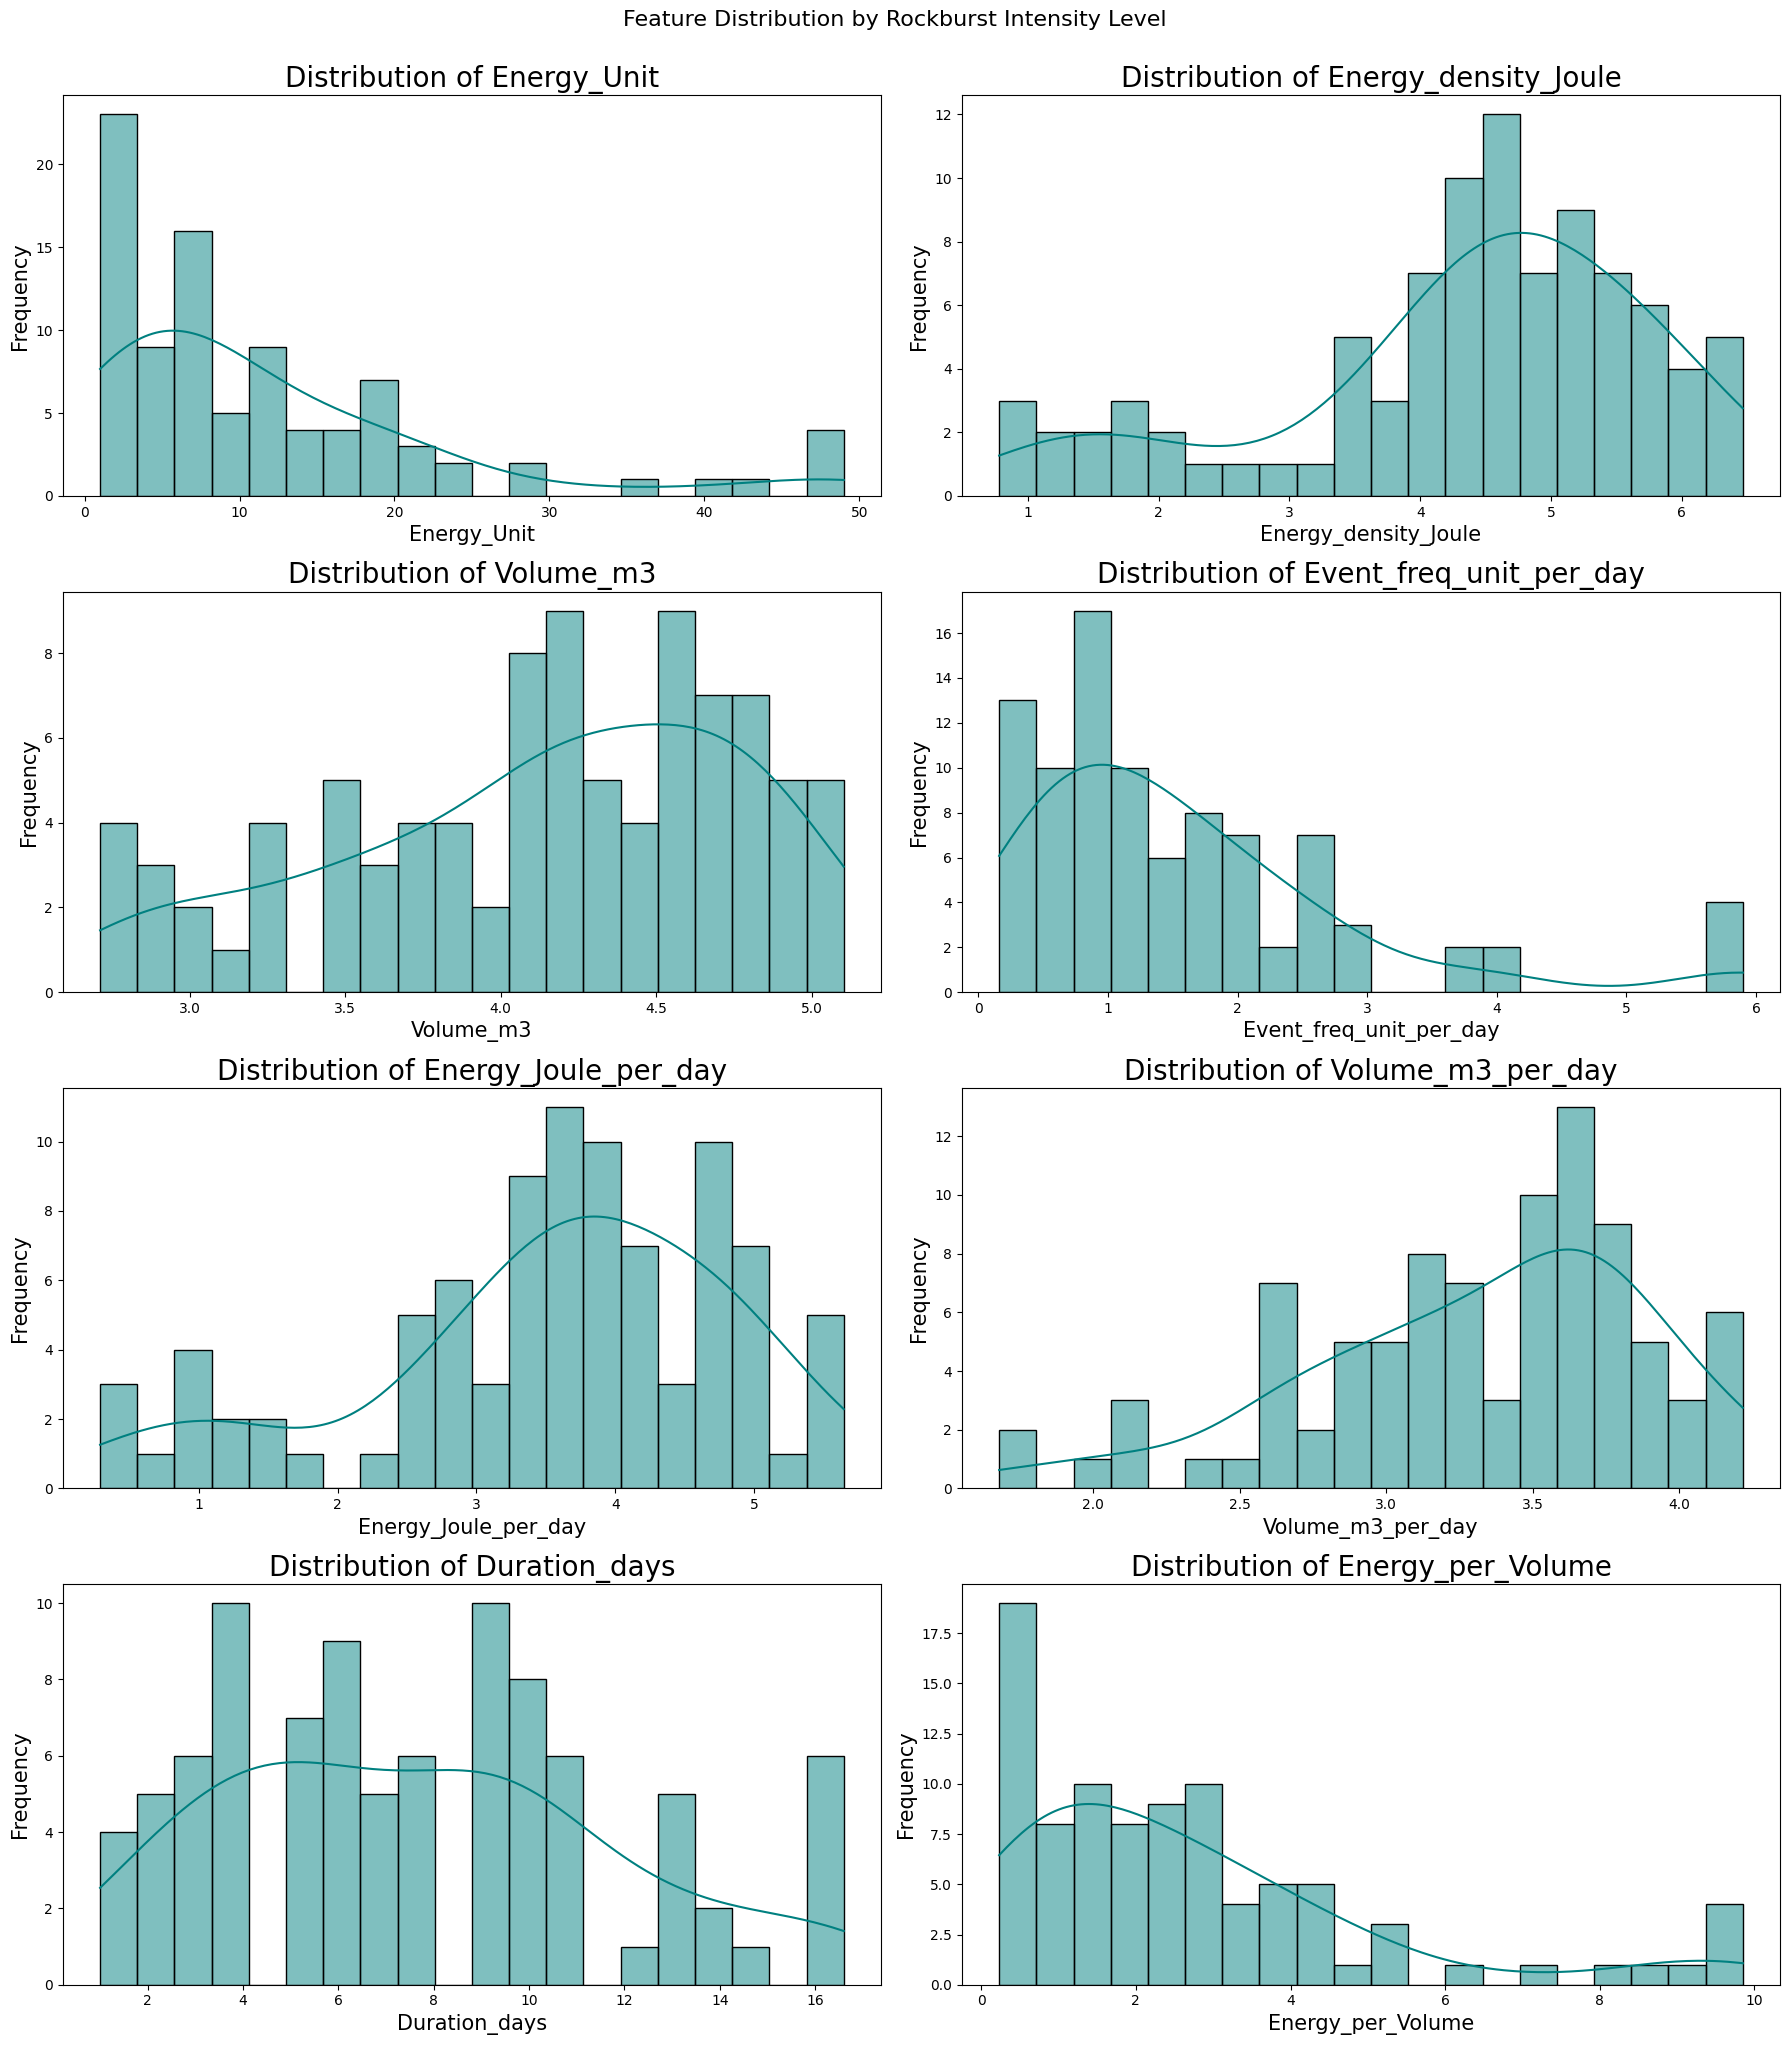

In [211]:
n_features = len(features)
# Grid layout
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, bins=20, color='teal', ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}", fontsize=20)
    axes[i].set_xlabel(feature,fontsize=15)
    axes[i].set_ylabel("Frequency",fontsize=15)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Feature Distribution by Rockburst Intensity Level", fontsize=16, y=1.02)
plt.show()
